# Covid19 Vaccionation Statistics in Maryland

In [96]:
# importing dependencies and resources
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json, requests
import gmaps
from scipy import spatial
# Import API key
from config import g_key

In [2]:
# loading csv files
vaccination_locations_path = "../Datasets/MD_Vaccination_Locations.csv"
doses_administered_path = "../Datasets/us-total-covid-19-vaccine-doses-administered.csv"


<center><i><h1 style="background-color:black;color:orange">Total covid-19 vaccine doses administered In The US</h1></i></center>
<div style="background-color:LightSlateGray">
<ul>
    <li>
        <p style="color:white;font-size:150%;background-color:LightSlateGray"> Analysis of the total number of vaccine doses administrated.</p>
    </li>
    <li>
        <p style="color:white;font-size:150%;background-color:LightSlateGray"> We will compare Maryland against other states in the United States.</p>
    </li>
    </ul>
</div>

In [3]:
total_doses_administered_df = pd.read_csv(doses_administered_path)
total_doses_administered_df.count()

Entity                3263
Code                   363
Date                  3263
total_vaccinations    3263
dtype: int64

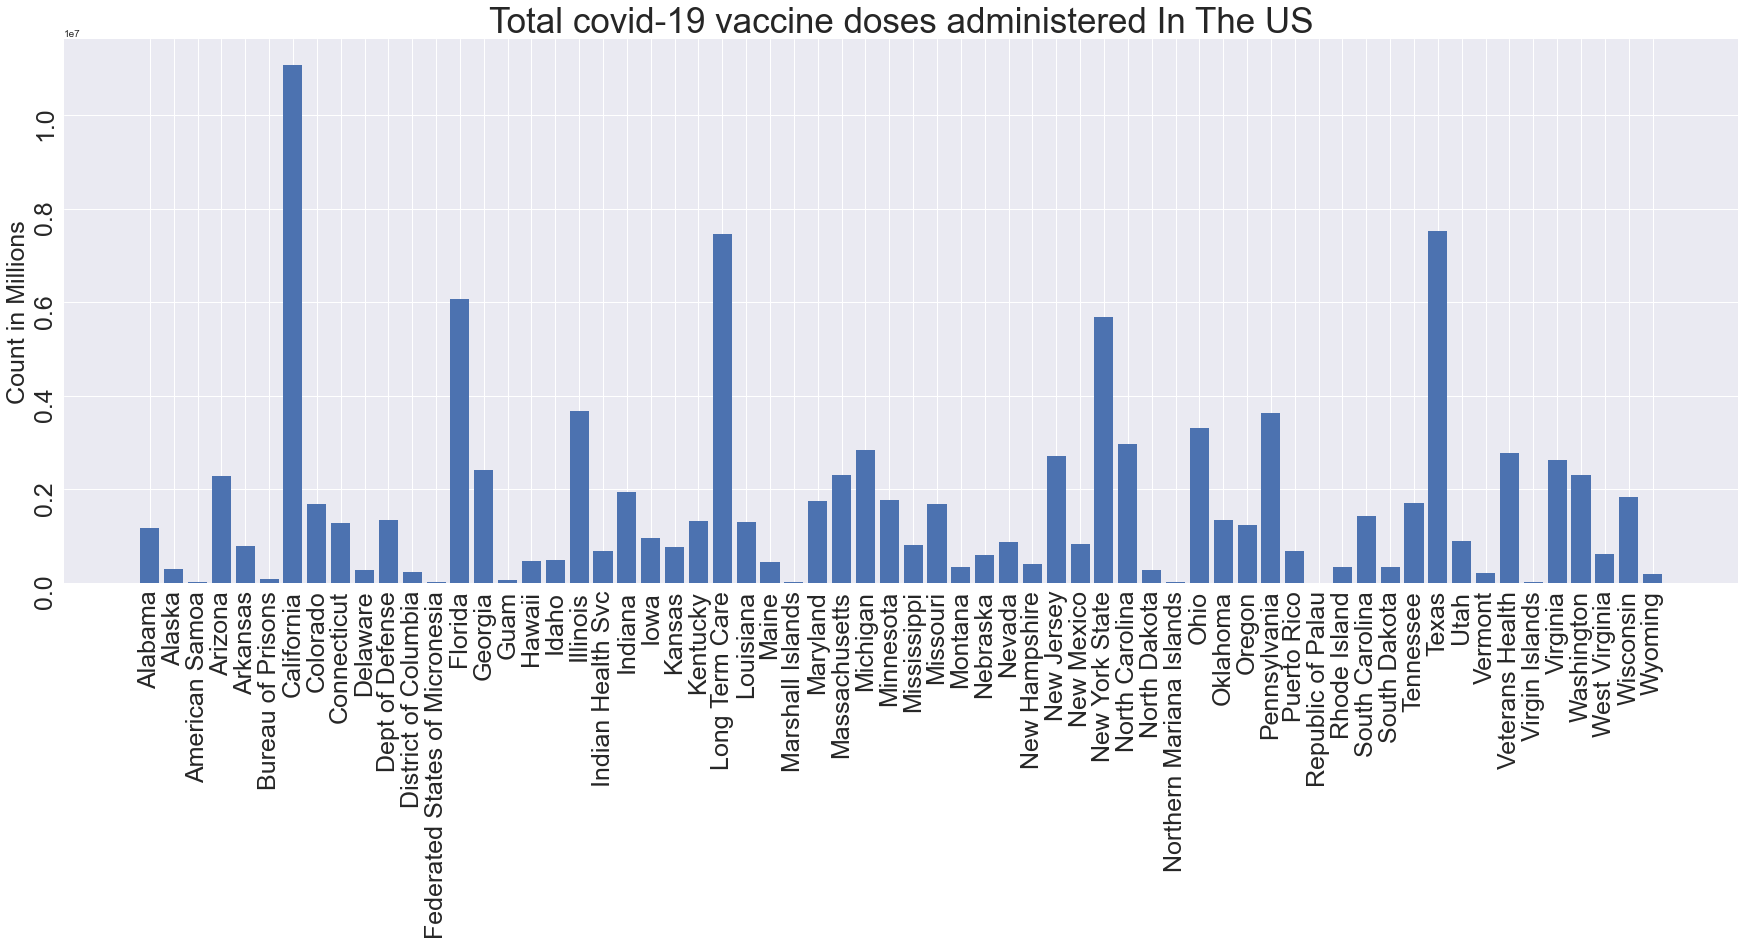

In [22]:
#
total_distributied_Vaccines = total_doses_administered_df.drop_duplicates(subset='Entity', keep='last')
total_distributied_Vaccines = total_distributied_Vaccines[['Entity',"total_vaccinations"]]
total_distributied_Vaccines = total_distributied_Vaccines[total_distributied_Vaccines["Entity"] != "United States"]
states = total_distributied_Vaccines['Entity']
total_count = total_distributied_Vaccines['total_vaccinations']

# creating A dataframe specific for maryland
maryland_distributed_vaccines_df =total_doses_administered_df[total_doses_administered_df['Entity'].isin(['Maryland'])]


# Setting Plot
plt.style.use('seaborn')
plt.figure(figsize=(30, 10))
# ax.set_xticklabels(states, )
plt.tick_params(labelsize=25, rotation=90)
plt.ylabel("Count in Millions", fontsize=25)
plt.title("Total covid-19 vaccine doses administered In The US",fontsize=35)
plt.bar(states, total_count);
plt.savefig("../Output_Data/Tota_covid-19_vaccine-doses-administered-In-The-US.png")

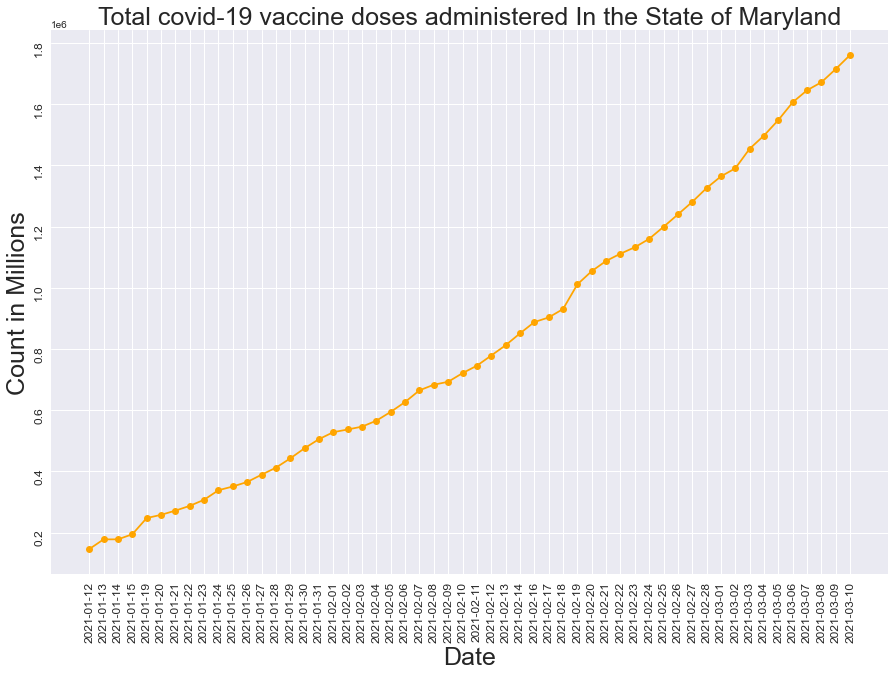

In [23]:
dates = maryland_distributed_vaccines_df['Date']
md_total_vaccines = maryland_distributed_vaccines_df['total_vaccinations']

plt.figure(figsize=(15,10))
plt.plot(dates, md_total_vaccines,marker='o', color='orange')
plt.ylabel("Count in Millions", fontsize=25)
plt.xlabel("Date", fontsize=25)
plt.title("Total covid-19 vaccine doses administered In the State of Maryland",fontsize=25)
plt.tick_params(labelsize=12, rotation=90)
plt.savefig("../Output_Data/Tota_covid-19_vaccine-doses-administered-In-The-US_by_date.png")

<center><i><h1 style="background-color:black;color:orange">All Maryland Vaccination Sites</h1></i></center>
<div style="background-color:LightSlateGray">
<ul>
    <li>
        <p style="color:white;font-size:150%;background-color:LightSlateGray"> This Section shows a map with all the vaccination sites in the State of Maryland.</p>
    </li>
    <li>
        <p style="color:white;font-size:150%;background-color:LightSlateGray"> You can Find the nearest vaccionation place to a specific address, providing it in the inputbox.</p>
    </li>
    </ul>
</div>

In [6]:
# Creating the initial DataFrame
locations_df = pd.read_csv(vaccination_locations_path)

# enable gmaps features on jupyternotebooks
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


### Configure gmaps key

In [7]:
# Google developer API key
# Access maps with unique API key
gmaps.configure(api_key=g_key)

In [8]:
locations_df.head()

,X,Y,OBJECTID,facilityid,name,fulladdr,municipality,CreationDate,Creator,EditDate,...,X_coord,Y_coord,test_pediatric,multi_language,test_pediatric_notes,created_user,created_date,last_edited_user,last_edited_date,County
0,-76.534166,38.990512,84,Anna_Lumi_83,Luminis Health Anne Arundel Medical Center,"2001 Medical Parkway, Annapolis, MD 21401",Annapolis,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,mdimapdatacatalog,2021/03/02 22:05:19.604+00,mdimapdatacatalog,2021/03/02 22:05:19.604+00,Anne Arundel
1,-76.865391,38.982597,87,Lanh_Lumi_86,Luminis Health Doctors Community Medical Center,"8118 Good Luck Road, Lanham, MD 20706",Lanham,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,mdimapdatacatalog,2021/03/02 22:05:19.604+00,mdimapdatacatalog,2021/03/02 22:05:19.604+00,Prince George's
2,-76.648885,39.288231,92,Balt_Grac_91,Grace Medical Center (formerly Bon Secours Hos...,"2000 West Baltimore Street, Baltimore, MD 21223",Baltimore,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,mdimapdatacatalog,2021/03/02 22:05:19.604+00,mdimapdatacatalog,2021/03/02 22:05:19.604+00,Baltimore City
3,-76.990634,39.557869,93,West_Carr_92,Carroll Hospital Center,"200 Memorial Avenue, Westminster, MD 21157",Westminster,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,mdimapdatacatalog,2021/03/02 22:05:19.604+00,mdimapdatacatalog,2021/03/02 22:05:19.604+00,Carroll
4,-76.885867,39.214293,95,Colu_Howa_94,Howard County General Hospital,"5755 Cedar Lane, Columbia, MD 21044",Columbia,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,mdimapdatacatalog,2021/03/02 22:05:19.604+00,mdimapdatacatalog,2021/03/02 22:05:19.604+00,Howard


In [9]:
# setting up map

#store lat and lng
locations = locations_df[["Y","X"]]

#map attributes
figure_layout = {
    'width': '1000px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': 'auto'
}
vaccination_map = gmaps.figure(center = [0,0] ,zoom_level =6, layout=figure_layout)

In [10]:
# Using the template add the Vaccionation sites marks to the map
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Address</dt><dd>{fulladdr}</dd>
<dt>municipality</dt><dd>{municipality}</dd>
</dl>
"""
# Store the DataFrame Row
places_info = [info_box_template.format(**row) for index, row in locations_df.iterrows()]
locations = locations_df[["Y", "X"]]

In [11]:
# Add marker layer ontop of heat map

# creating the markers
markers = gmaps.marker_layer(locations, info_box_content= places_info)

#adding the markers
vaccination_map.add_layer(markers)

# Display figure
vaccination_map

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='auto', padding='1px', width='1000…

In [120]:
users_address = input("Enter your Address >> ")

Enter your Address >> DC


In [121]:
# Target city
target_address = users_address

# Build the endpoint URL
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_address, g_key)
# sending request through Google API
geo_data = requests.get(target_url).json()

# Extract latitude and longitude
lat = geo_data["results"][0]["geometry"]["location"]["lat"]
lng = geo_data["results"][0]["geometry"]["location"]["lng"]

In [122]:
# Obtaining a list with tuples inside containing the coordinates of all the vaccination sites in Maryland
vaccination_points = [(x,y) for y,x in zip(locations['Y'], locations['X'])]
tree = spatial.KDTree(vaccination_points)
result = tree.query([(lng,lat)])
# obtaining the index that containts the nearest place using the coordinates to compare the distance
index = result[1][0] 

In [123]:

facility = locations_df.iloc[index]["name"]
address = locations_df.iloc[index]["fulladdr"]

In [124]:
print(f"The nearest vaccination center to you is: {facility} ")
print(f"located at: {address}")


The nearest vaccination center to you is: Walgreens Oakland 
located at: 209 N 3rd St Oakland MD 21550


<center><i><h1 style="background-color:black;color:orange">Maryland Fully Vaccinated Population</h1></i></center>
<div style="background-color:LightSlateGray">
<ul>
    <li>
        <p style="color:white;font-size:150%;background-color:LightSlateGray">Analysis of the total population and percentof the population that has been fully vaccinated.</p>
    </li>
    <li>
        <p style="color:white;font-size:150%;background-color:LightSlateGray">Analysis will be used to determine by what date the fully vaccinated population of Maryland will reach 50% and 75%..</p>
    </li>
    </ul>
</div>

In [21]:
# loading csv files
vaccinated = "../Datasets/us_state_vaccinations.csv"
us_vaccinated = pd.read_csv(vaccinated)

In [24]:
#reduces data set to just Maryland and removes columns that are not useful.
md_vaccinated = us_vaccinated.loc[us_vaccinated['location']=='Maryland']
md_vaccinated_clean = md_vaccinated[['date', 
                                     'location', 
                                     'total_vaccinations', 
                                     'total_distributed', 
                                     'people_vaccinated', 
                                     'people_fully_vaccinated']]

#drops rows with empty values
md_vaccinated_clean = md_vaccinated_clean.dropna(how='any')
md_vaccinated_clean.head(3)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated
1568,2021-01-12,Maryland,146231.0,552800.0,136576.0,6663.0
1569,2021-01-13,Maryland,178056.0,561500.0,162350.0,12706.0
1571,2021-01-15,Maryland,194705.0,565125.0,178831.0,15830.0


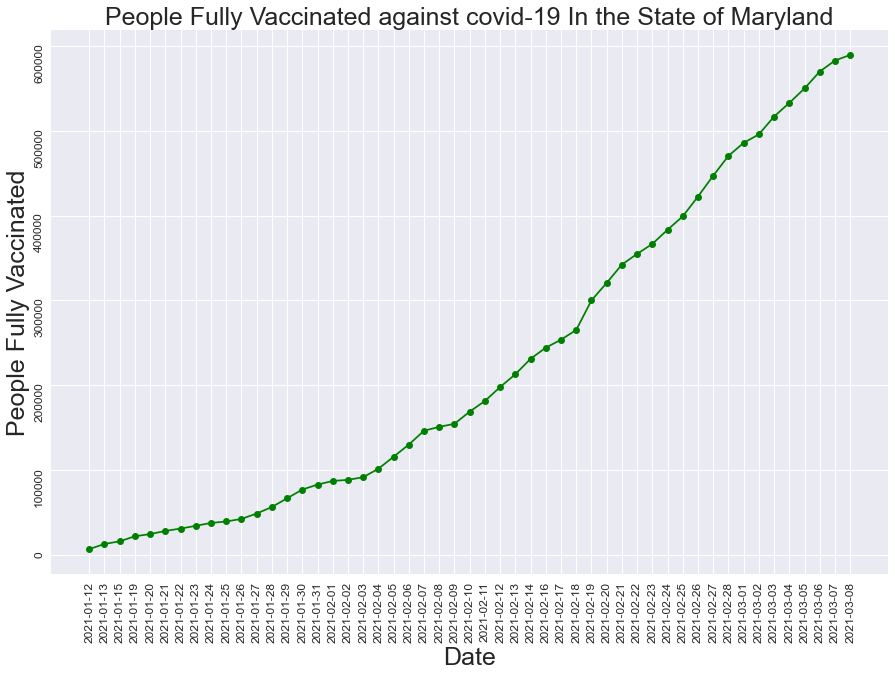

In [25]:
#creates line graph to depict people fully vaccinated, daily

plt.figure(figsize=(15,10))
x_axis_fv = md_vaccinated_clean['date']
y_axis_fv = md_vaccinated_clean['people_fully_vaccinated']
plt.plot(x_axis_fv, y_axis_fv,marker='o', color='green')
plt.ylabel("People Fully Vaccinated", fontsize=25)
plt.xlabel("Date", fontsize=25)
plt.title("People Fully Vaccinated against covid-19 In the State of Maryland",fontsize=25)
plt.tick_params(labelsize=12, rotation=90)

In [27]:
#creates new column for percent_of_population fully vaccinated and performs calculation to determine percentage
md_vaccinated_clean['percent_of_population'] = ''

for index,row in md_vaccinated_clean.iterrows():
    percent_pop = (md_vaccinated_clean.loc[index, 'people_fully_vaccinated'] / 6045680) * 100
    md_vaccinated_clean.loc[index, 'percent_of_population'] = percent_pop
    
md_vaccinated_clean.head(3)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated,percent_of_population
1568,2021-01-12,Maryland,146231.0,552800.0,136576.0,6663.0,0.110211
1569,2021-01-13,Maryland,178056.0,561500.0,162350.0,12706.0,0.210167
1571,2021-01-15,Maryland,194705.0,565125.0,178831.0,15830.0,0.26184


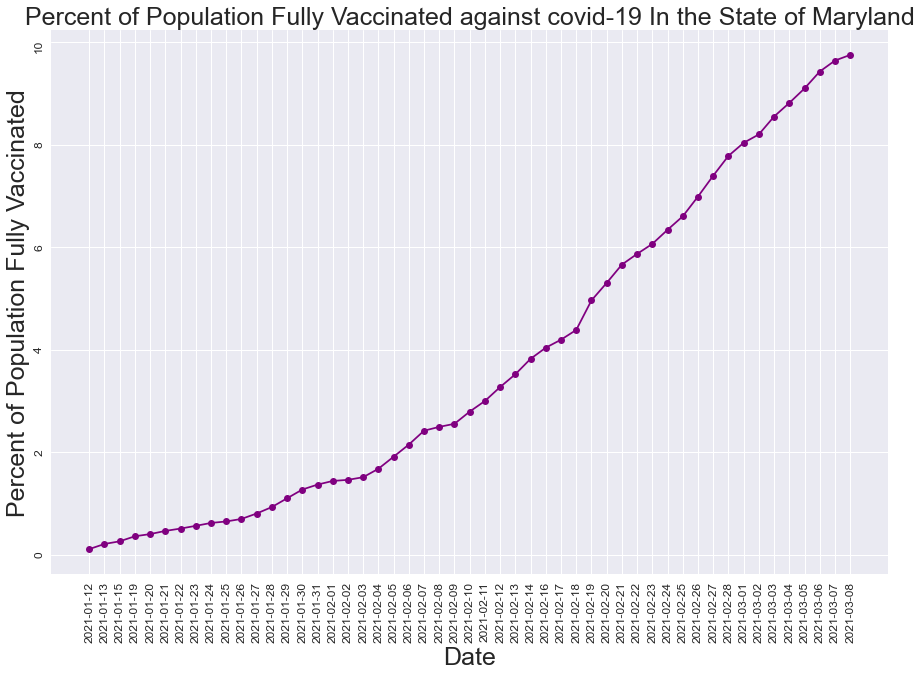

In [29]:
#creates line graph to depict percent of population fully vaccinated, daily

plt.figure(figsize=(15,10))
x_axis_pp = md_vaccinated_clean['date']
y_axis_pp = md_vaccinated_clean['percent_of_population']
plt.plot(x_axis_pp, y_axis_pp, marker='o', color='purple')
plt.ylabel("Percent of Population Fully Vaccinated", fontsize=25)
plt.xlabel("Date", fontsize=25)
plt.title("Percent of Population Fully Vaccinated against covid-19 In the State of Maryland",fontsize=25)
plt.tick_params(labelsize=12, rotation=90)